Carga de datos y parámetros

In [1]:
import pandas as pd
from statds.no_parametrics import friedman, nemenyi

In [2]:


alpha = 0.05 # Esto indica que la confianza de los resultados de los tests es al 95%, que es un valor ampliamente usado 
# (también se puede cambiar a 0.01, siendo más fuertes las conclusiones de diferencias significativas entre algoritmos)

# Cambiar el separador si es necesario
# En mis datos tengo 3 algoritmos (las 3 columnas), y 16 conjuntos de datos.
# Tu tendrias por ejemplo las 3 versiones (agregaciones) del algoritmo, y tantas filas como numero de conjuntos de datos x repeticiones
#   De ese modo, si tienes 10 conjuntos de datos y repitieses cada experimento, por ejemplo 10 veces, tendrías 100 filas.
F1MACRO_LOCAL_AGGS= pd.read_csv("F1MACRO_LOCAL_AGGS.csv",sep=';')
F1MACRO_GLOBAL_AGGS= pd.read_csv("F1MACRO_GLOBAL_AGGS.csv",sep=';')
SSACCURACY_LOCAL_AGGS= pd.read_csv("SSACCURACY_LOCAL_AGGS.csv",sep=';')
SSACCURACY_GLOBAL_AGGS= pd.read_csv("SSACCURACY_GLOBAL_AGGS.csv",sep=';')

F1MACRO_LOCAL_AGGS.columns.values[0] = 'dataset'
F1MACRO_GLOBAL_AGGS.columns.values[0] = 'dataset'
SSACCURACY_GLOBAL_AGGS.columns.values[0] = 'dataset'
SSACCURACY_LOCAL_AGGS.columns.values[0] = 'dataset'

SSACCURACY_GLOBAL_AGGS=SSACCURACY_GLOBAL_AGGS.iloc[:,:4]
# Tendrias una tabla como ese csv por cada métrica y por cada tipo de escenario de test (yo lo cargo de un csv porque es como lo tenía, pero si ya tienes esa info en un df de pandas ... lo puedes usar directo en el resto del código)
#   como sacariamos por ejemplo 4 métricas, y evaluamos sobre el test global y el local, serian 8 tablas/comparaciones
# (Si tienes que hacer varias veces el test, ejecuta el notebook varias veces con distintos csv)

### ---
# En esta variable voy a simular que solo tengo dos algoritmos para comparar, si fuese el caso que tuvieses alguna comparación así, porque se procede ligeramente diferente
# dataset2 = dataset3.iloc[:, [0,1,3]]
# dataset2

### COMPARACIÓN AGREGACIONES

In [3]:
print('================F1MACRO LOCAL AGG=====================')
rankings3, statistic3, p_value3, critical_value3, hypothesis3 = friedman(F1MACRO_LOCAL_AGGS, alpha, minimize=False)
print(hypothesis3)
print(f"Statistic {statistic3}, p-value {p_value3}")
print(rankings3)


================F1MACRO LOCAL AGG=====================
Fail to Reject H0 with alpha = 0.05 (Same distributions)
Statistic 0.6815642458100228, p-value 0.7112138485341888
{'AGG0': 1.9497206703910615, 'AGG1': 2.0279329608938546, 'AGG2': 2.022346368715084}


================F1MACRO GLOBAL AGG=====================
Reject H0 with alpha = 0.05 (Different distributions)
Statistic 10.695530726256948, p-value 0.004758773261407501
{'AGG0': 1.812849162011173, 'AGG1': 2.153631284916201, 'AGG2': 2.0335195530726256}
[1.812849162011173, 2.153631284916201, 2.0335195530726256]
0.24773683823570478


/var/folders/rz/rwdts9855175trx5l6s0n6380000gp/T/ipykernel_6060/3643460820.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figure.show()


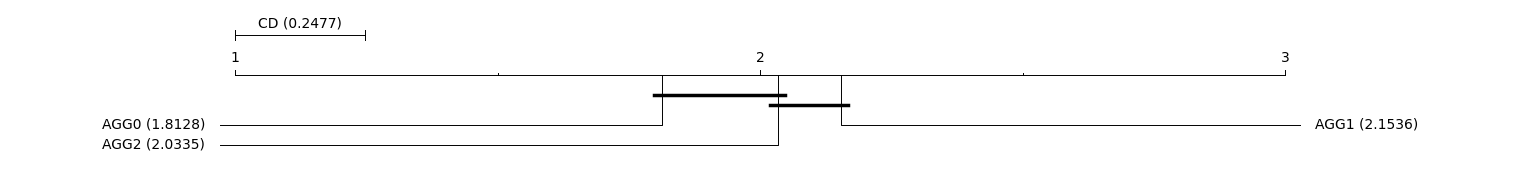

In [4]:
print('================F1MACRO GLOBAL AGG=====================')
rankings3, statistic3, p_value3, critical_value3, hypothesis3 = friedman(F1MACRO_GLOBAL_AGGS, alpha, minimize=False)
print(hypothesis3)
print(f"Statistic {statistic3}, p-value {p_value3}")
print(rankings3)

ranks_values, critical_distance_nemenyi, figure = nemenyi(rankings3, F1MACRO_GLOBAL_AGGS.shape[0], alpha)
print(ranks_values)
print(critical_distance_nemenyi)
figure.show()

================SSACCURACY LOCAL AGG=====================
Reject H0 with alpha = 0.05 (Different distributions)
Statistic 139.4944134078214, p-value 7.639666677050627e-11
{'AGG0': 2.7206703910614527, 'AGG1': 1.6508379888268156, 'AGG2': 1.6284916201117319}
[2.7206703910614527, 1.6508379888268156, 1.6284916201117319]
0.24773683823570478


/var/folders/rz/rwdts9855175trx5l6s0n6380000gp/T/ipykernel_6060/3783417826.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figure.show()


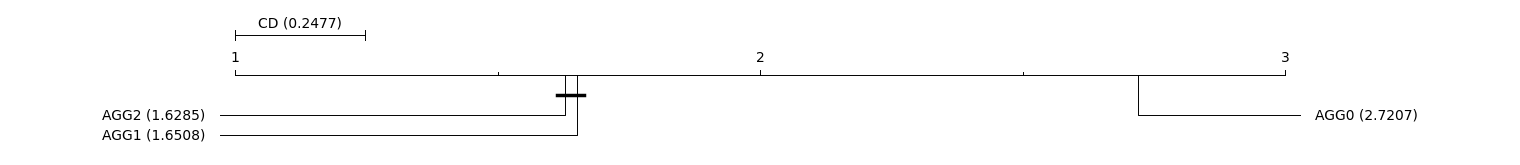

In [5]:
print('================SSACCURACY LOCAL AGG=====================')
rankings3, statistic3, p_value3, critical_value3, hypothesis3 = friedman(SSACCURACY_LOCAL_AGGS, alpha, minimize=False)
print(hypothesis3)
print(f"Statistic {statistic3}, p-value {p_value3}")
print(rankings3)

ranks_values, critical_distance_nemenyi, figure = nemenyi(rankings3, SSACCURACY_LOCAL_AGGS.shape[0], alpha)
print(ranks_values)
print(critical_distance_nemenyi)
figure.show()

================SSACCURACY GLOBAL AGG=====================
Reject H0 with alpha = 0.05 (Different distributions)
Statistic 9.597765363128474, p-value 0.008238947448754974
{'AGG0': 1.8156424581005586, 'AGG1': 2.1284916201117317, 'AGG2': 2.0558659217877095}
[1.8156424581005586, 2.1284916201117317, 2.0558659217877095]
0.24773683823570478


/var/folders/rz/rwdts9855175trx5l6s0n6380000gp/T/ipykernel_6060/792705454.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figure.show()


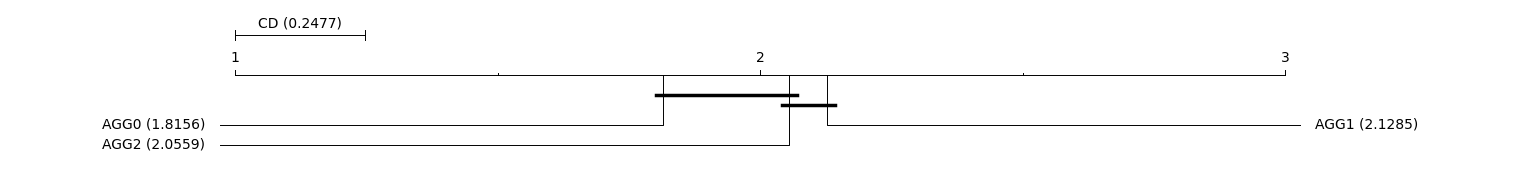

In [6]:
print('================SSACCURACY GLOBAL AGG=====================')
rankings3, statistic3, p_value3, critical_value3, hypothesis3 = friedman(SSACCURACY_GLOBAL_AGGS, alpha, minimize=False)
print(hypothesis3)
print(f"Statistic {statistic3}, p-value {p_value3}")
print(rankings3)

ranks_values, critical_distance_nemenyi, figure = nemenyi(rankings3, SSACCURACY_GLOBAL_AGGS.shape[0], alpha)
print(ranks_values)
print(critical_distance_nemenyi)
figure.show()

#### F1 Macro Local:
    - No hay diferencias significativas entre los distintos métodos de agregación, p>alpha

#### F1 Macro Global:
    - Se ve (porque el test de nemenyi los une con la línea) que AGG0 y AGG2 son comparables, y que el rendimiento de AGG1 es significativamente distinto (y peor) que AGG0 (ya que no los une una línea) (nótese de paso que no se encuentra diferencia si solo comparamos AGG2 y AGG1 en este caso). Entre AGG0 y 2, el 0 es ligeramente mejor, pero no se puede determinar estadísticamente.

#### Subset Accuracy Local:
    - Los métodos AGG2 y AGG1 son comparables, y ambos significativamente mejores que AGG0.

#### Subset Accuracy Global:
    - Resultados similares a F1 Macro Global

Por tanto, en resumen, se puede decir que el mejor método de agregación es AGG2, ya que en todos los casos analizados está en el grupo de los mejores, y en ningún caso hay otro agregador que funcione significativamente mejor que él; mientras que AGG2 es significativamente peor que AGG1 en 2 casos, y AGG1 es significativamente peor que el resto en 1 caso. Por tanto, AGG3 es el que tiene los resultados más consistentes.

### COMPARACIÓN FEDERADO (AGG2) Y NO FEDERADO

In [7]:
F1MACRO_LOCAL_FED= pd.read_csv("F1MACRO_LOCAL_FED.csv",sep=';')
F1MACRO_GLOBAL_FED= pd.read_csv("F1MACRO_GLOBAL_FED.csv",sep=';')
SSACCURACY_LOCAL_FED= pd.read_csv("SSACCURACY_LOCAL_FED.csv",sep=';')
SSACCURACY_GLOBAL_FED= pd.read_csv("SSACCURACY_GLOBAL_FED.csv",sep=';')

SSACCURACY_GLOBAL_FED=SSACCURACY_GLOBAL_FED.iloc[:,:3]

================F1MACRO LOCAL FED=====================
Reject H0 with alpha = 0.05 (Different distributions)
Statistic 68.8324022346369, p-value 3.6543323922444415e-11
{'FED AGG 2': 1.8100558659217878, 'NO FED': 1.1899441340782122}
[1.8100558659217878, 1.1899441340782122]
0.1464946048282832


/var/folders/rz/rwdts9855175trx5l6s0n6380000gp/T/ipykernel_6060/957085633.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figure.show()


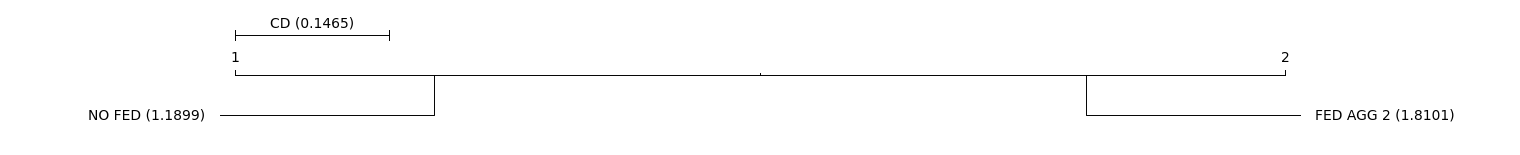

In [8]:
print('================F1MACRO LOCAL FED=====================')
rankings2, statistic2, p_value2, critical_value2, hypothesis2 = friedman(F1MACRO_LOCAL_FED, alpha, minimize=False)
print(hypothesis2)
print(f"Statistic {statistic2}, p-value {p_value2}")
print(rankings2)


ranks_values, critical_distance_nemenyi, figure = nemenyi(rankings2, F1MACRO_GLOBAL_FED.shape[0], alpha)
print(ranks_values)
print(critical_distance_nemenyi)
figure.show()

================F1MACRO GLOBAL FED=====================
Reject H0 with alpha = 0.05 (Different distributions)
Statistic 76.47486033519567, p-value 7.653677691621397e-11
{'FED AGG 2': 1.8268156424581006, 'NO FED': 1.1731843575418994}
[1.8268156424581006, 1.1731843575418994]
0.1464946048282832


/var/folders/rz/rwdts9855175trx5l6s0n6380000gp/T/ipykernel_6060/2912500712.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figure.show()


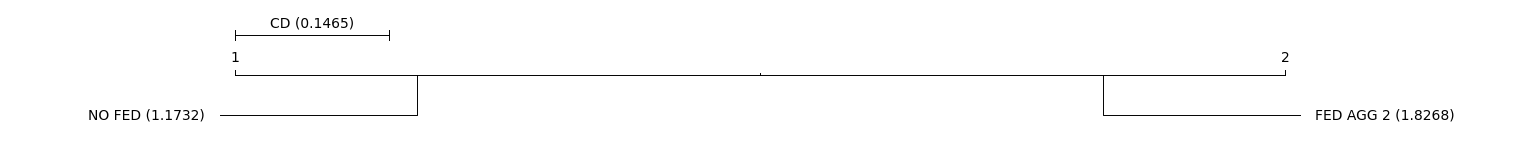

In [9]:
print('================F1MACRO GLOBAL FED=====================')
rankings2, statistic2, p_value2, critical_value2, hypothesis2 = friedman(F1MACRO_GLOBAL_FED, alpha, minimize=False)
print(hypothesis2)
print(f"Statistic {statistic2}, p-value {p_value2}")
print(rankings2)

ranks_values, critical_distance_nemenyi, figure = nemenyi(rankings2, F1MACRO_GLOBAL_FED.shape[0], alpha)
print(ranks_values)
print(critical_distance_nemenyi)
figure.show()

In [10]:
print('================SSACCURACY LOCAL FED=====================')
rankings2, statistic2, p_value2, critical_value2, hypothesis2 = friedman(SSACCURACY_LOCAL_FED, alpha, minimize=False)
print(hypothesis2)
print(f"Statistic {statistic2}, p-value {p_value2}")
print(rankings2)

================SSACCURACY LOCAL FED=====================
Fail to Reject H0 with alpha = 0.05 (Same distributions)
Statistic 1.8100558659218677, p-value 0.178501528390981
{'FED AGG 2': 1.4497206703910615, 'NO FED': 1.5502793296089385}


================SSACCURACY GLOBAL FED=====================
Reject H0 with alpha = 0.05 (Different distributions)
Statistic 5.368715083798861, p-value 0.020501074280348863
{'FED AGG 2': 1.4134078212290502, 'NO FED': 1.5865921787709498}
[1.4134078212290502, 1.5865921787709498]
0.1464946048282832


/var/folders/rz/rwdts9855175trx5l6s0n6380000gp/T/ipykernel_6060/28998674.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figure.show()


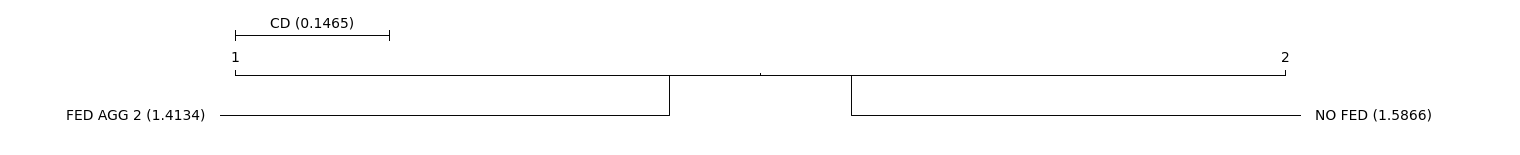

In [11]:
print('================SSACCURACY GLOBAL FED=====================')
rankings2, statistic2, p_value2, critical_value2, hypothesis2 = friedman(SSACCURACY_GLOBAL_FED, alpha, minimize=False)
print(hypothesis2)
print(f"Statistic {statistic2}, p-value {p_value2}")
print(rankings2)

ranks_values, critical_distance_nemenyi, figure = nemenyi(rankings2, SSACCURACY_GLOBAL_FED.shape[0], alpha)
print(ranks_values)
print(critical_distance_nemenyi)
figure.show()